# Backtesting Investment Strategies

## 1. Importing the Data

### Dataset is US Stocks from Dow Jones Index (dji)
### We use the subset of data from Jan 1st 2010 to March 3rd 2020

In [189]:
import pandas as pd

In [190]:
pd.read_csv("dji.csv").info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3333 non-null   object 
 1   Open       3333 non-null   float64
 2   High       3333 non-null   float64
 3   Low        3333 non-null   float64
 4   Close      3333 non-null   float64
 5   Adj Close  3333 non-null   float64
 6   Volume     3333 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 182.4+ KB


In [191]:
data = pd.read_csv("dji.csv", parse_dates = ["Date"], index_col = "Date")
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-01-03,12459.540039,12580.349609,12404.820312,12474.519531,12474.519531,327200000
2007-01-04,12473.160156,12510.410156,12403.860352,12480.690430,12480.690430,259060000
2007-01-05,12480.049805,12480.129883,12365.410156,12398.009766,12398.009766,235220000
2007-01-08,12392.009766,12445.919922,12337.370117,12423.490234,12423.490234,223500000
2007-01-09,12424.769531,12466.429688,12369.169922,12416.599609,12416.599609,225190000
...,...,...,...,...,...,...
2020-03-24,19722.189453,20737.699219,19649.250000,20704.910156,20704.910156,799340000
2020-03-25,21050.339844,22019.929688,20538.339844,21200.550781,21200.550781,796320000
2020-03-26,21468.380859,22595.060547,21427.099609,22552.169922,22552.169922,705180000


In [192]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3333 entries, 2007-01-03 to 2020-03-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3333 non-null   float64
 1   High       3333 non-null   float64
 2   Low        3333 non-null   float64
 3   Close      3333 non-null   float64
 4   Adj Close  3333 non-null   float64
 5   Volume     3333 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 182.3 KB


In [193]:
df = data.loc["2010-01-01": "2020-03-31", "Close"].to_frame()
df

,Close
Date,
2010-01-04,10583.959961
2010-01-05,10572.019531
2010-01-06,10573.679688
2010-01-07,10606.860352
2010-01-08,10618.190430
...,...
2020-03-24,20704.910156
2020-03-25,21200.550781
2020-03-26,22552.169922


## 2. Data Visualization

In [194]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.style.use("seaborn-v0_8-whitegrid")
# seaborn new naming convention


In [195]:
df.describe()

,Close
count,2577.000000
mean,17820.342520
std,5292.260933
min,9686.480469
25%,13034.490234
50%,17113.150391
75%,21892.429688
max,29551.419922


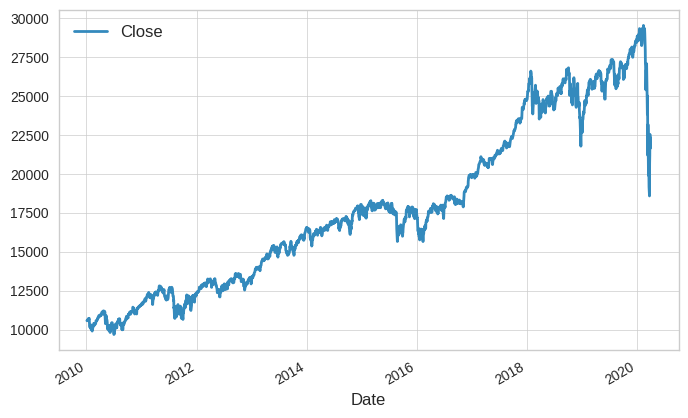

In [196]:
df.plot(figsize = (8, 5), fontsize = 10)
plt.legend(fontsize = 12)
plt.show()

In [197]:
df["Return"] = df.pct_change()
df.dropna(inplace = True)
df

,Close,Return
Date,,
2010-01-05,10572.019531,-0.001128
2010-01-06,10573.679688,0.000157
2010-01-07,10606.860352,0.003138
2010-01-08,10618.190430,0.001068
2010-01-11,10663.990234,0.004313
...,...,...
2020-03-24,20704.910156,0.113650
2020-03-25,21200.550781,0.023938
2020-03-26,22552.169922,0.063754


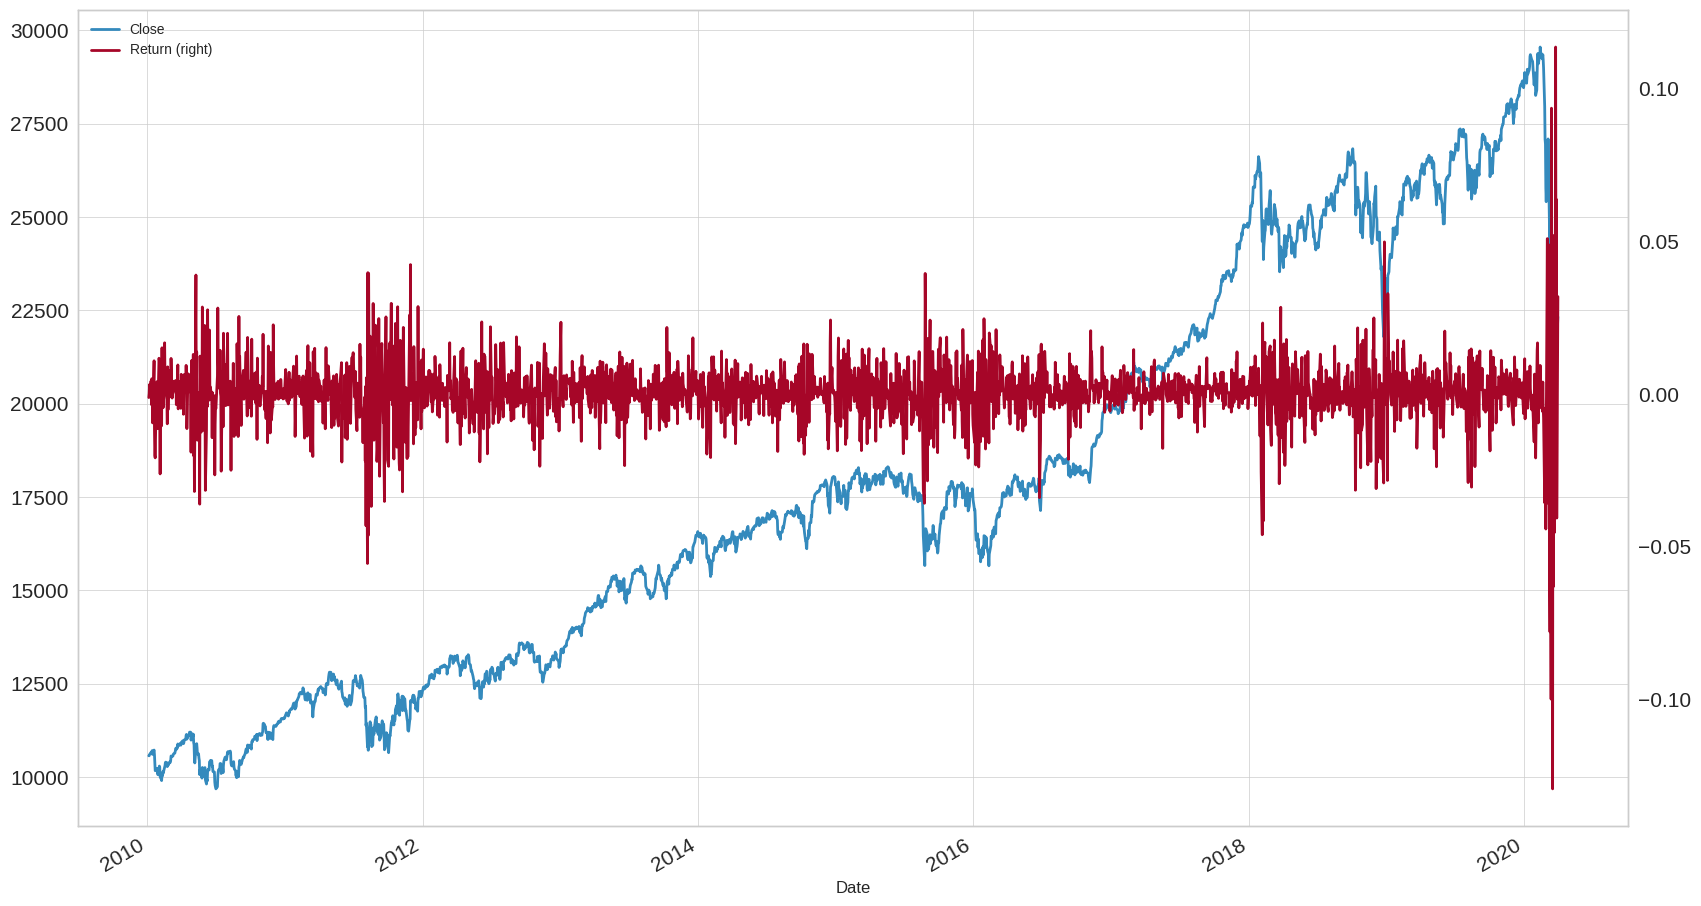

In [198]:
df.plot(figsize = (20, 12), secondary_y = "Return", mark_right = True, fontsize = 15)
plt.show()

In [199]:
df.rename(columns = {"Close":"DJI_Close", "Return":"DJI_Return"}, inplace = True)

In [200]:
df

,DJI_Close,DJI_Return
Date,,
2010-01-05,10572.019531,-0.001128
2010-01-06,10573.679688,0.000157
2010-01-07,10606.860352,0.003138
2010-01-08,10618.190430,0.001068
2010-01-11,10663.990234,0.004313
...,...,...
2020-03-24,20704.910156,0.113650
2020-03-25,21200.550781,0.023938
2020-03-26,22552.169922,0.063754


## I. Backtesting A Simple Momentum Strategy

Positions: +1 (investing), -1 (short-selling), 0 (neutral/no position) <br>

Basic Strategy: Buy and Hold <br>
(Initially Investing into DJI and do nothing ie. Position: +1 on any given day) <br>
Active Strategy: Simple Momentum <br>
Investing (+1) into DJI tomorrow if the days return was positive <br>
Short selling (-1) DJI tomorrow if the days return was negative <br>

In [201]:
df

,DJI_Close,DJI_Return
Date,,
2010-01-05,10572.019531,-0.001128
2010-01-06,10573.679688,0.000157
2010-01-07,10606.860352,0.003138
2010-01-08,10618.190430,0.001068
2010-01-11,10663.990234,0.004313
...,...,...
2020-03-24,20704.910156,0.113650
2020-03-25,21200.550781,0.023938
2020-03-26,22552.169922,0.063754


In [202]:
df["Position"] = np.sign(df["DJI_Return"])

In [203]:
df

,DJI_Close,DJI_Return,Position
Date,,,
2010-01-05,10572.019531,-0.001128,-1.0
2010-01-06,10573.679688,0.000157,1.0
2010-01-07,10606.860352,0.003138,1.0
2010-01-08,10618.190430,0.001068,1.0
2010-01-11,10663.990234,0.004313,1.0
...,...,...,...
2020-03-24,20704.910156,0.113650,1.0
2020-03-25,21200.550781,0.023938,1.0
2020-03-26,22552.169922,0.063754,1.0


In [204]:
df["Strategy_Ret"] = df["Position"].shift() * df["DJI_Return"]

In [205]:
df

,DJI_Close,DJI_Return,Position,Strategy_Ret
Date,,,,
2010-01-05,10572.019531,-0.001128,-1.0,NaN
2010-01-06,10573.679688,0.000157,1.0,-0.000157
2010-01-07,10606.860352,0.003138,1.0,0.003138
2010-01-08,10618.190430,0.001068,1.0,0.001068
2010-01-11,10663.990234,0.004313,1.0,0.004313
...,...,...,...,...
2020-03-24,20704.910156,0.113650,1.0,-0.113650
2020-03-25,21200.550781,0.023938,1.0,0.023938
2020-03-26,22552.169922,0.063754,1.0,0.063754


In [206]:
df.Strategy_Ret.add(1, fill_value = 0).cumprod() #cumulative returns

,Strategy_Ret
Date,
2010-01-05,1.000000
2010-01-06,0.999843
2010-01-07,1.002981
2010-01-08,1.004052
2010-01-11,1.008383
...,...
2020-03-24,0.472559
2020-03-25,0.483871
2020-03-26,0.514720


In [207]:

df["Strategy"] = df.Strategy_Ret.add(1, fill_value = 0).cumprod() * df.iloc[0, 0]

In [208]:
df

,DJI_Close,DJI_Return,Position,Strategy_Ret,Strategy
Date,,,,,
2010-01-05,10572.019531,-0.001128,-1.0,NaN,10572.019531
2010-01-06,10573.679688,0.000157,1.0,-0.000157,10570.359375
2010-01-07,10606.860352,0.003138,1.0,0.003138,10603.529620
2010-01-08,10618.190430,0.001068,1.0,0.001068,10614.856140
2010-01-11,10663.990234,0.004313,1.0,0.004313,10660.641563
...,...,...,...,...,...
2020-03-24,20704.910156,0.113650,1.0,-0.113650,4995.902521
2020-03-25,21200.550781,0.023938,1.0,0.023938,5115.496000
2020-03-26,22552.169922,0.063754,1.0,0.063754,5441.629145


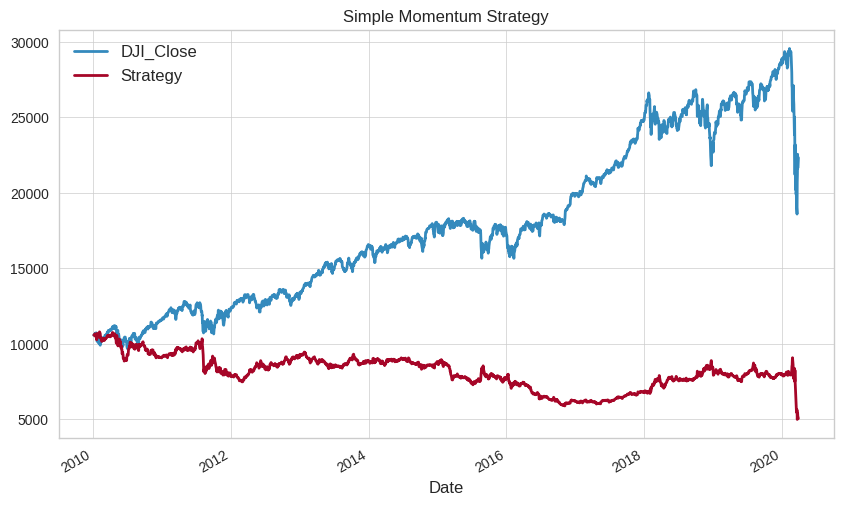

In [209]:
df[["DJI_Close", "Strategy"]].plot(figsize = (10, 6), fontsize = 10)
plt.title("Simple Momentum Strategy", fontsize = 12)
plt.legend(fontsize = 12)
plt.show()

In [210]:
def summary_ann(returns):
    summary = returns.agg(["mean"]).T
    summary["Return"] = summary["mean"] * 252
    #252 trading days in a year
    #summary["Risk"] = summary["std"] * np.sqrt(252)
    #risk proportional to sqrt of time
    summary.drop(columns = ["mean"], inplace = True)
    #remove mean,std we just risk and return
    return summary

In [211]:
summary_ann(df[["DJI_Return", "Strategy_Ret"]])

,Return
DJI_Return,0.087212
Strategy_Ret,-0.057966


## II. Backtesting a Simple Contrarian Strategy

Basic Strategy: Buy And Hold

Strategy to be tested: Simple Contrarian <br>
Short Selling (-1) DJI tomorrow if the days return was positive <br>
Investing (+1) into DJI tomorrow if the days return was negative

In [212]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-01-03,12459.540039,12580.349609,12404.820312,12474.519531,12474.519531,327200000
2007-01-04,12473.160156,12510.410156,12403.860352,12480.690430,12480.690430,259060000
2007-01-05,12480.049805,12480.129883,12365.410156,12398.009766,12398.009766,235220000
2007-01-08,12392.009766,12445.919922,12337.370117,12423.490234,12423.490234,223500000
2007-01-09,12424.769531,12466.429688,12369.169922,12416.599609,12416.599609,225190000
...,...,...,...,...,...,...
2020-03-24,19722.189453,20737.699219,19649.250000,20704.910156,20704.910156,799340000
2020-03-25,21050.339844,22019.929688,20538.339844,21200.550781,21200.550781,796320000
2020-03-26,21468.380859,22595.060547,21427.099609,22552.169922,22552.169922,705180000


In [213]:
df = data.loc["2010":, "Close"].to_frame()
df["DJI_Return"] = df.Close.pct_change()
df.columns = ["DJI_Close", "DJI_Return"]
df.dropna(inplace = True)
df

,DJI_Close,DJI_Return
Date,,
2010-01-05,10572.019531,-0.001128
2010-01-06,10573.679688,0.000157
2010-01-07,10606.860352,0.003138
2010-01-08,10618.190430,0.001068
2010-01-11,10663.990234,0.004313
...,...,...
2020-03-24,20704.910156,0.113650
2020-03-25,21200.550781,0.023938
2020-03-26,22552.169922,0.063754


In [214]:
df["Position"] = -np.sign(df["DJI_Return"]) #opposite of simple momentum

In [215]:
df

,DJI_Close,DJI_Return,Position
Date,,,
2010-01-05,10572.019531,-0.001128,1.0
2010-01-06,10573.679688,0.000157,-1.0
2010-01-07,10606.860352,0.003138,-1.0
2010-01-08,10618.190430,0.001068,-1.0
2010-01-11,10663.990234,0.004313,-1.0
...,...,...,...
2020-03-24,20704.910156,0.113650,-1.0
2020-03-25,21200.550781,0.023938,-1.0
2020-03-26,22552.169922,0.063754,-1.0


In [216]:
df["Strategy_Ret"] = df["Position"].shift() * df["DJI_Return"]
df

,DJI_Close,DJI_Return,Position,Strategy_Ret
Date,,,,
2010-01-05,10572.019531,-0.001128,1.0,NaN
2010-01-06,10573.679688,0.000157,-1.0,0.000157
2010-01-07,10606.860352,0.003138,-1.0,-0.003138
2010-01-08,10618.190430,0.001068,-1.0,-0.001068
2010-01-11,10663.990234,0.004313,-1.0,-0.004313
...,...,...,...,...
2020-03-24,20704.910156,0.113650,-1.0,0.113650
2020-03-25,21200.550781,0.023938,-1.0,-0.023938
2020-03-26,22552.169922,0.063754,-1.0,-0.063754


In [217]:
df["Strategy"] = df.Strategy_Ret.add(1, fill_value = 0).cumprod() * df.iloc[0, 0]
df

,DJI_Close,DJI_Return,Position,Strategy_Ret,Strategy
Date,,,,,
2010-01-05,10572.019531,-0.001128,1.0,NaN,10572.019531
2010-01-06,10573.679688,0.000157,-1.0,0.000157,10573.679688
2010-01-07,10606.860352,0.003138,-1.0,-0.003138,10540.499023
2010-01-08,10618.190430,0.001068,-1.0,-0.001068,10529.239831
2010-01-11,10663.990234,0.004313,-1.0,-0.004313,10483.823700
...,...,...,...,...,...
2020-03-24,20704.910156,0.113650,-1.0,0.113650,16885.390373
2020-03-25,21200.550781,0.023938,-1.0,-0.023938,16481.182609
2020-03-26,22552.169922,0.063754,-1.0,-0.063754,15430.441894


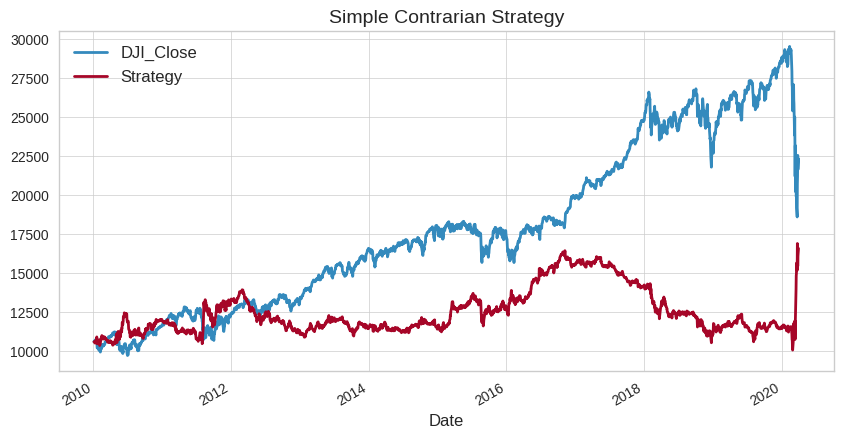

In [218]:
df[["DJI_Close", "Strategy"]].plot(figsize = (10, 5), fontsize = 10)
plt.legend(fontsize = 12)
plt.title("Simple Contrarian Strategy", fontsize = 14)
plt.show()

In [219]:
summary_ann(df[["DJI_Return", "Strategy_Ret"]])

,Return
DJI_Return,0.087212
Strategy_Ret,0.057966


## III. Simple Moving Averages

Basic Strategy: Buy and hold

Strategy to be tested: SMA Crossover Momentum <br>

Investing (+1): short term avg crosses above long term avg <br>
This signals potential uptrend <br>

Short Selling (-1): short term avg crosses below long term avg <br>
This signals potential downtrend

In [234]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-01-03,12459.540039,12580.349609,12404.820312,12474.519531,12474.519531,327200000
2007-01-04,12473.160156,12510.410156,12403.860352,12480.690430,12480.690430,259060000
2007-01-05,12480.049805,12480.129883,12365.410156,12398.009766,12398.009766,235220000
2007-01-08,12392.009766,12445.919922,12337.370117,12423.490234,12423.490234,223500000
2007-01-09,12424.769531,12466.429688,12369.169922,12416.599609,12416.599609,225190000
...,...,...,...,...,...,...
2020-03-24,19722.189453,20737.699219,19649.250000,20704.910156,20704.910156,799340000
2020-03-25,21050.339844,22019.929688,20538.339844,21200.550781,21200.550781,796320000
2020-03-26,21468.380859,22595.060547,21427.099609,22552.169922,22552.169922,705180000


In [235]:
df = data.loc["2010":, "Close"].to_frame()
df["DJI_Return"] = df.Close.pct_change()
df.columns = ["DJI_Close", "DJI_Return"]
df.dropna(inplace = True)
df

,DJI_Close,DJI_Return
Date,,
2010-01-05,10572.019531,-0.001128
2010-01-06,10573.679688,0.000157
2010-01-07,10606.860352,0.003138
2010-01-08,10618.190430,0.001068
2010-01-11,10663.990234,0.004313
...,...,...
2020-03-24,20704.910156,0.113650
2020-03-25,21200.550781,0.023938
2020-03-26,22552.169922,0.063754


In [236]:
df.DJI_Close.rolling(window = 50).mean() #rolling window of past 49+current, we take mean

,DJI_Close
Date,
2010-01-05,NaN
2010-01-06,NaN
2010-01-07,NaN
2010-01-08,NaN
2010-01-11,NaN
...,...
2020-03-24,26708.547930
2020-03-25,26554.417930
2020-03-26,26426.667930


In [237]:
df["SMA50"] = df.DJI_Close.rolling(window = 50).mean()

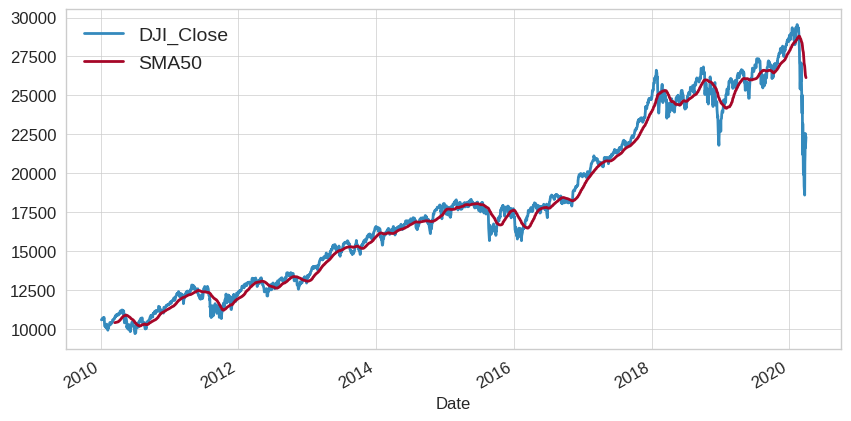

In [238]:
df[["DJI_Close", "SMA50"]].plot(figsize = (10, 5), fontsize = 12)
plt.legend(fontsize = 14)
plt.show()

In [240]:
df["SMA200"] = df.DJI_Close.rolling(window = 200).mean()
df

,DJI_Close,DJI_Return,SMA50,SMA200
Date,,,,
2010-01-05,10572.019531,-0.001128,NaN,NaN
2010-01-06,10573.679688,0.000157,NaN,NaN
2010-01-07,10606.860352,0.003138,NaN,NaN
2010-01-08,10618.190430,0.001068,NaN,NaN
2010-01-11,10663.990234,0.004313,NaN,NaN
...,...,...,...,...
2020-03-24,20704.910156,0.113650,26708.547930,27010.902910
2020-03-25,21200.550781,0.023938,26554.417930,26986.592266
2020-03-26,22552.169922,0.063754,26426.667930,26969.110566


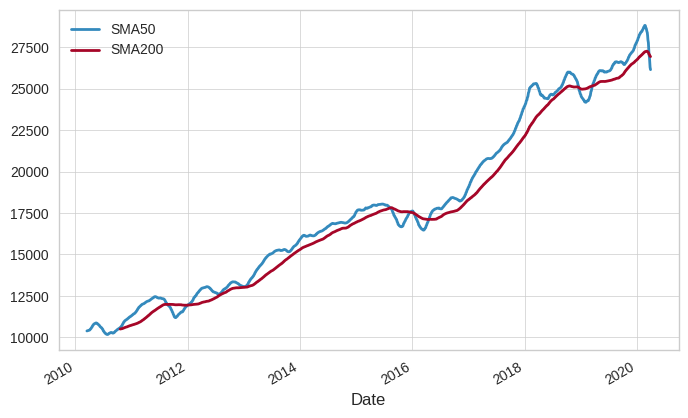

In [245]:
df[["SMA50", "SMA200"]].plot(figsize = (8, 5), fontsize = 10)
plt.legend(fontsize = 10)
plt.show()

In [246]:
df.dropna(inplace= True)

In [247]:
df

,DJI_Close,DJI_Return,SMA50,SMA200
Date,,,,
2010-10-19,10978.620117,-0.014813,10582.089805,10507.098203
2010-10-20,11107.969727,0.011782,10591.364199,10509.777954
2010-10-21,11146.570312,0.003475,10606.719004,10512.642407
2010-10-22,11132.559570,-0.001257,10622.971191,10515.270903
2010-10-25,11164.049805,0.002829,10640.189180,10518.000200
...,...,...,...,...
2020-03-24,20704.910156,0.113650,26708.547930,27010.902910
2020-03-25,21200.550781,0.023938,26554.417930,26986.592266
2020-03-26,22552.169922,0.063754,26426.667930,26969.110566


In [248]:
df["Position"] = np.sign(df.SMA50.sub(df.SMA200))

In [249]:
df

,DJI_Close,DJI_Return,SMA50,SMA200,Position
Date,,,,,
2010-10-19,10978.620117,-0.014813,10582.089805,10507.098203,1.0
2010-10-20,11107.969727,0.011782,10591.364199,10509.777954,1.0
2010-10-21,11146.570312,0.003475,10606.719004,10512.642407,1.0
2010-10-22,11132.559570,-0.001257,10622.971191,10515.270903,1.0
2010-10-25,11164.049805,0.002829,10640.189180,10518.000200,1.0
...,...,...,...,...,...
2020-03-24,20704.910156,0.113650,26708.547930,27010.902910,-1.0
2020-03-25,21200.550781,0.023938,26554.417930,26986.592266,-1.0
2020-03-26,22552.169922,0.063754,26426.667930,26969.110566,-1.0


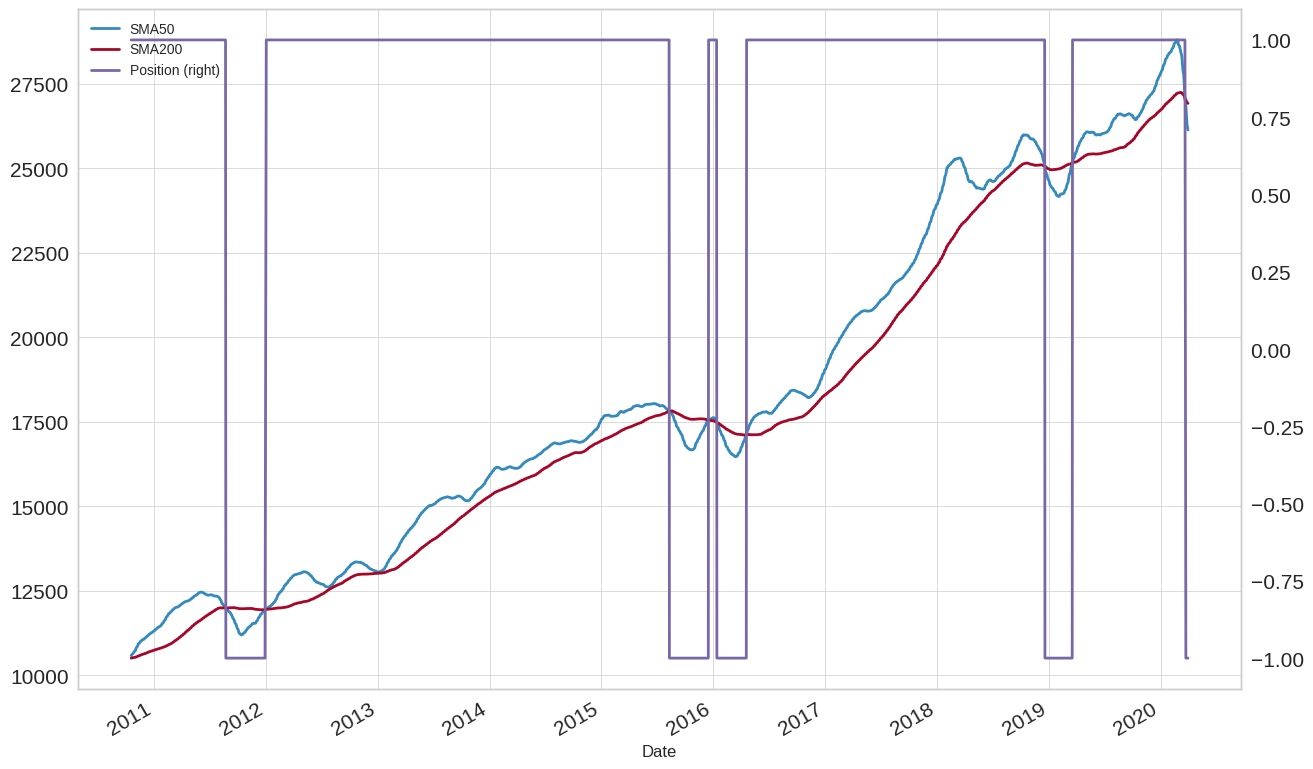

In [250]:
df[["SMA50", "SMA200", "Position"]].plot(figsize = (15, 10), secondary_y = "Position", fontsize = 15)
plt.show()

In [253]:
df["Strategy_Ret"] = df["Position"].shift() * df["DJI_Return"]
df

,DJI_Close,DJI_Return,SMA50,SMA200,Position,Strategy_Ret,Strategy
Date,,,,,,,
2010-10-19,10978.620117,-0.014813,10582.089805,10507.098203,1.0,NaN,10978.620117
2010-10-20,11107.969727,0.011782,10591.364199,10509.777954,1.0,0.011782,11107.969727
2010-10-21,11146.570312,0.003475,10606.719004,10512.642407,1.0,0.003475,11146.570312
2010-10-22,11132.559570,-0.001257,10622.971191,10515.270903,1.0,-0.001257,11132.559570
2010-10-25,11164.049805,0.002829,10640.189180,10518.000200,1.0,0.002829,11164.049805
...,...,...,...,...,...,...,...
2020-03-24,20704.910156,0.113650,26708.547930,27010.902910,-1.0,-0.113650,8400.973271
2020-03-25,21200.550781,0.023938,26554.417930,26986.592266,-1.0,-0.023938,8199.868141
2020-03-26,22552.169922,0.063754,26426.667930,26969.110566,-1.0,-0.063754,7677.094047


In [254]:
df["Strategy"] = df.Strategy_Ret.add(1, fill_value = 0).cumprod() * df.iloc[0, 0]
df

,DJI_Close,DJI_Return,SMA50,SMA200,Position,Strategy_Ret,Strategy
Date,,,,,,,
2010-10-19,10978.620117,-0.014813,10582.089805,10507.098203,1.0,NaN,10978.620117
2010-10-20,11107.969727,0.011782,10591.364199,10509.777954,1.0,0.011782,11107.969727
2010-10-21,11146.570312,0.003475,10606.719004,10512.642407,1.0,0.003475,11146.570312
2010-10-22,11132.559570,-0.001257,10622.971191,10515.270903,1.0,-0.001257,11132.559570
2010-10-25,11164.049805,0.002829,10640.189180,10518.000200,1.0,0.002829,11164.049805
...,...,...,...,...,...,...,...
2020-03-24,20704.910156,0.113650,26708.547930,27010.902910,-1.0,-0.113650,8400.973271
2020-03-25,21200.550781,0.023938,26554.417930,26986.592266,-1.0,-0.023938,8199.868141
2020-03-26,22552.169922,0.063754,26426.667930,26969.110566,-1.0,-0.063754,7677.094047


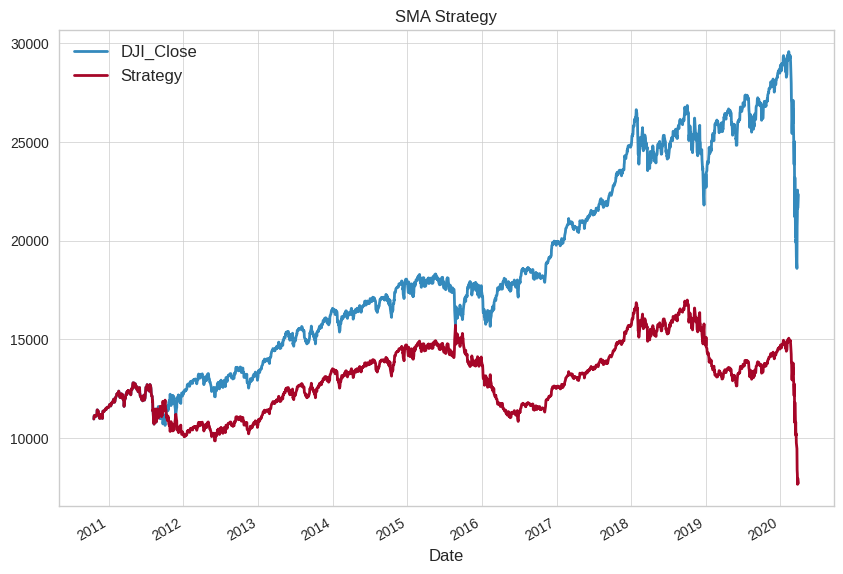

In [256]:
df[["DJI_Close", "Strategy"]].plot(figsize = (10, 7), fontsize = 10)
plt.legend(fontsize = 12)
plt.title("SMA Strategy", fontsize = 12)
plt.show()

In [257]:
summary_ann(df[["DJI_Return", "Strategy_Ret"]])

,Return
DJI_Return,0.087819
Strategy_Ret,-0.022887


In [267]:
#contrarian sma strategy
df["Position"] = -np.sign(df.SMA50.sub(df.SMA200))
df

,DJI_Close,DJI_Return,SMA50,SMA200,Position,Strategy_Ret,Strategy
Date,,,,,,,
2010-10-19,10978.620117,-0.014813,10582.089805,10507.098203,-1.0,NaN,10978.620117
2010-10-20,11107.969727,0.011782,10591.364199,10509.777954,-1.0,-0.011782,10849.270508
2010-10-21,11146.570312,0.003475,10606.719004,10512.642407,-1.0,-0.003475,10811.568911
2010-10-22,11132.559570,-0.001257,10622.971191,10515.270903,-1.0,0.001257,10825.158571
2010-10-25,11164.049805,0.002829,10640.189180,10518.000200,-1.0,-0.002829,10794.537870
...,...,...,...,...,...,...,...
2020-03-24,20704.910156,0.113650,26708.547930,27010.902910,1.0,0.113650,11084.154806
2020-03-25,21200.550781,0.023938,26554.417930,26986.592266,1.0,0.023938,11349.490775
2020-03-26,22552.169922,0.063754,26426.667930,26969.110566,1.0,0.063754,12073.065796


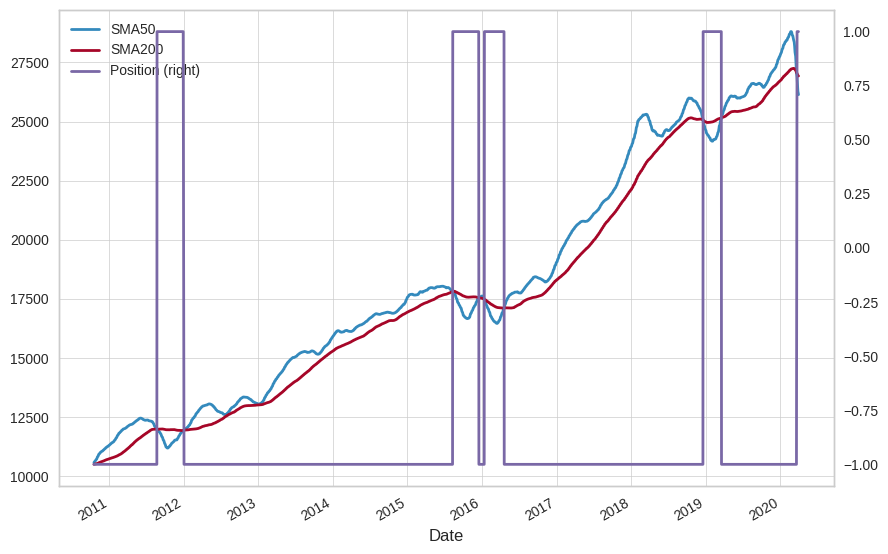

In [269]:
df[["SMA50", "SMA200", "Position"]].plot(figsize = (10, 7), secondary_y = "Position", fontsize = 10)
plt.show()

In [270]:
df["Strategy_Ret"] = df["Position"].shift() * df["DJI_Return"]

In [271]:
df

,DJI_Close,DJI_Return,SMA50,SMA200,Position,Strategy_Ret,Strategy
Date,,,,,,,
2010-10-19,10978.620117,-0.014813,10582.089805,10507.098203,-1.0,NaN,10978.620117
2010-10-20,11107.969727,0.011782,10591.364199,10509.777954,-1.0,-0.011782,10849.270508
2010-10-21,11146.570312,0.003475,10606.719004,10512.642407,-1.0,-0.003475,10811.568911
2010-10-22,11132.559570,-0.001257,10622.971191,10515.270903,-1.0,0.001257,10825.158571
2010-10-25,11164.049805,0.002829,10640.189180,10518.000200,-1.0,-0.002829,10794.537870
...,...,...,...,...,...,...,...
2020-03-24,20704.910156,0.113650,26708.547930,27010.902910,1.0,0.113650,11084.154806
2020-03-25,21200.550781,0.023938,26554.417930,26986.592266,1.0,0.023938,11349.490775
2020-03-26,22552.169922,0.063754,26426.667930,26969.110566,1.0,0.063754,12073.065796


In [272]:
df["Strategy"] = df.Strategy_Ret.add(1, fill_value = 0).cumprod() * df.iloc[0, 0]

In [273]:
df

,DJI_Close,DJI_Return,SMA50,SMA200,Position,Strategy_Ret,Strategy
Date,,,,,,,
2010-10-19,10978.620117,-0.014813,10582.089805,10507.098203,-1.0,NaN,10978.620117
2010-10-20,11107.969727,0.011782,10591.364199,10509.777954,-1.0,-0.011782,10849.270508
2010-10-21,11146.570312,0.003475,10606.719004,10512.642407,-1.0,-0.003475,10811.568911
2010-10-22,11132.559570,-0.001257,10622.971191,10515.270903,-1.0,0.001257,10825.158571
2010-10-25,11164.049805,0.002829,10640.189180,10518.000200,-1.0,-0.002829,10794.537870
...,...,...,...,...,...,...,...
2020-03-24,20704.910156,0.113650,26708.547930,27010.902910,1.0,0.113650,11084.154806
2020-03-25,21200.550781,0.023938,26554.417930,26986.592266,1.0,0.023938,11349.490775
2020-03-26,22552.169922,0.063754,26426.667930,26969.110566,1.0,0.063754,12073.065796


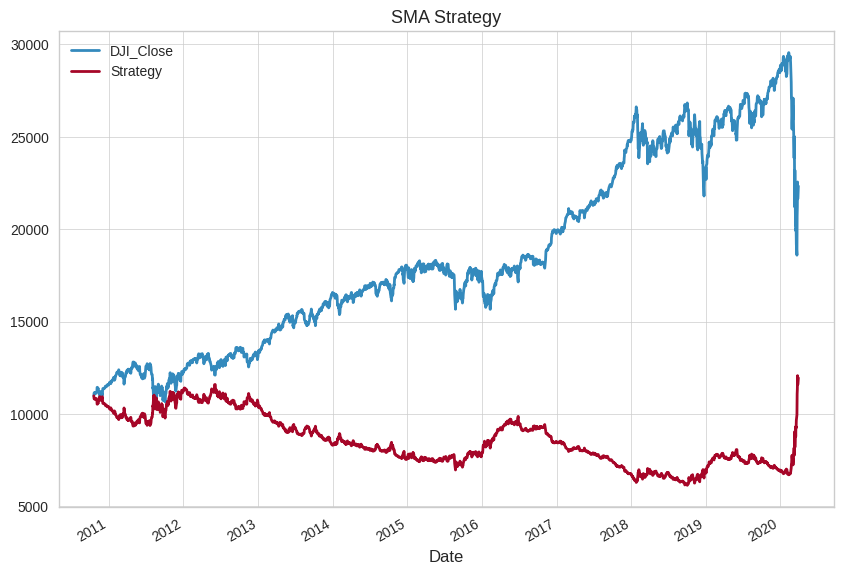

In [276]:
df[["DJI_Close", "Strategy"]].plot(figsize = (10, 7), fontsize = 10)
plt.legend(fontsize = 10)
plt.title("SMA Strategy", fontsize = 13)
plt.show()

In [266]:
summary_ann(df[["DJI_Return", "Strategy_Ret"]])

,Return
DJI_Return,0.087819
Strategy_Ret,0.022887


## IV. Perfect Strategy Investing

Ideal case where we can predict whether the day's returns will be positive/negative and we can take the correct position for that day


In [277]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-01-03,12459.540039,12580.349609,12404.820312,12474.519531,12474.519531,327200000
2007-01-04,12473.160156,12510.410156,12403.860352,12480.690430,12480.690430,259060000
2007-01-05,12480.049805,12480.129883,12365.410156,12398.009766,12398.009766,235220000
2007-01-08,12392.009766,12445.919922,12337.370117,12423.490234,12423.490234,223500000
2007-01-09,12424.769531,12466.429688,12369.169922,12416.599609,12416.599609,225190000
...,...,...,...,...,...,...
2020-03-24,19722.189453,20737.699219,19649.250000,20704.910156,20704.910156,799340000
2020-03-25,21050.339844,22019.929688,20538.339844,21200.550781,21200.550781,796320000
2020-03-26,21468.380859,22595.060547,21427.099609,22552.169922,22552.169922,705180000


In [278]:
df = data.loc["2010":, "Close"].to_frame()
df["DJI_Return"] = df.Close.pct_change()
df.columns = ["DJI_Close", "DJI_Return"]
df.dropna(inplace = True)
df

,DJI_Close,DJI_Return
Date,,
2010-01-05,10572.019531,-0.001128
2010-01-06,10573.679688,0.000157
2010-01-07,10606.860352,0.003138
2010-01-08,10618.190430,0.001068
2010-01-11,10663.990234,0.004313
...,...,...
2020-03-24,20704.910156,0.113650
2020-03-25,21200.550781,0.023938
2020-03-26,22552.169922,0.063754


In [279]:
df["Position"] = np.sign(df["DJI_Return"])

In [80]:
df

,DJI_Close,DJI_Return,Position
Date,,,
2010-01-05,10572.019531,-0.001128,-1.0
2010-01-06,10573.679688,0.000157,1.0
2010-01-07,10606.860352,0.003138,1.0
2010-01-08,10618.190430,0.001068,1.0
2010-01-11,10663.990234,0.004313,1.0
...,...,...,...
2020-03-24,20704.910156,0.113650,1.0
2020-03-25,21200.550781,0.023938,1.0
2020-03-26,22552.169922,0.063754,1.0


In [280]:
df["Strategy_Ret"] = df["Position"] * df["DJI_Return"]

In [281]:
df

,DJI_Close,DJI_Return,Position,Strategy_Ret
Date,,,,
2010-01-05,10572.019531,-0.001128,-1.0,0.001128
2010-01-06,10573.679688,0.000157,1.0,0.000157
2010-01-07,10606.860352,0.003138,1.0,0.003138
2010-01-08,10618.190430,0.001068,1.0,0.001068
2010-01-11,10663.990234,0.004313,1.0,0.004313
...,...,...,...,...
2020-03-24,20704.910156,0.113650,1.0,0.113650
2020-03-25,21200.550781,0.023938,1.0,0.023938
2020-03-26,22552.169922,0.063754,1.0,0.063754


In [282]:
df["Strategy"] = df.Strategy_Ret.add(1, fill_value = 0).cumprod() * df.iloc[0, 0]

In [283]:
df

,DJI_Close,DJI_Return,Position,Strategy_Ret,Strategy
Date,,,,,
2010-01-05,10572.019531,-0.001128,-1.0,0.001128,1.058395e+04
2010-01-06,10573.679688,0.000157,1.0,0.000157,1.058561e+04
2010-01-07,10606.860352,0.003138,1.0,0.003138,1.061883e+04
2010-01-08,10618.190430,0.001068,1.0,0.001068,1.063017e+04
2010-01-11,10663.990234,0.004313,1.0,0.004313,1.067602e+04
...,...,...,...,...,...
2020-03-24,20704.910156,0.113650,1.0,0.113650,1.856178e+11
2020-03-25,21200.550781,0.023938,1.0,0.023938,1.900611e+11
2020-03-26,22552.169922,0.063754,1.0,0.063754,2.021783e+11


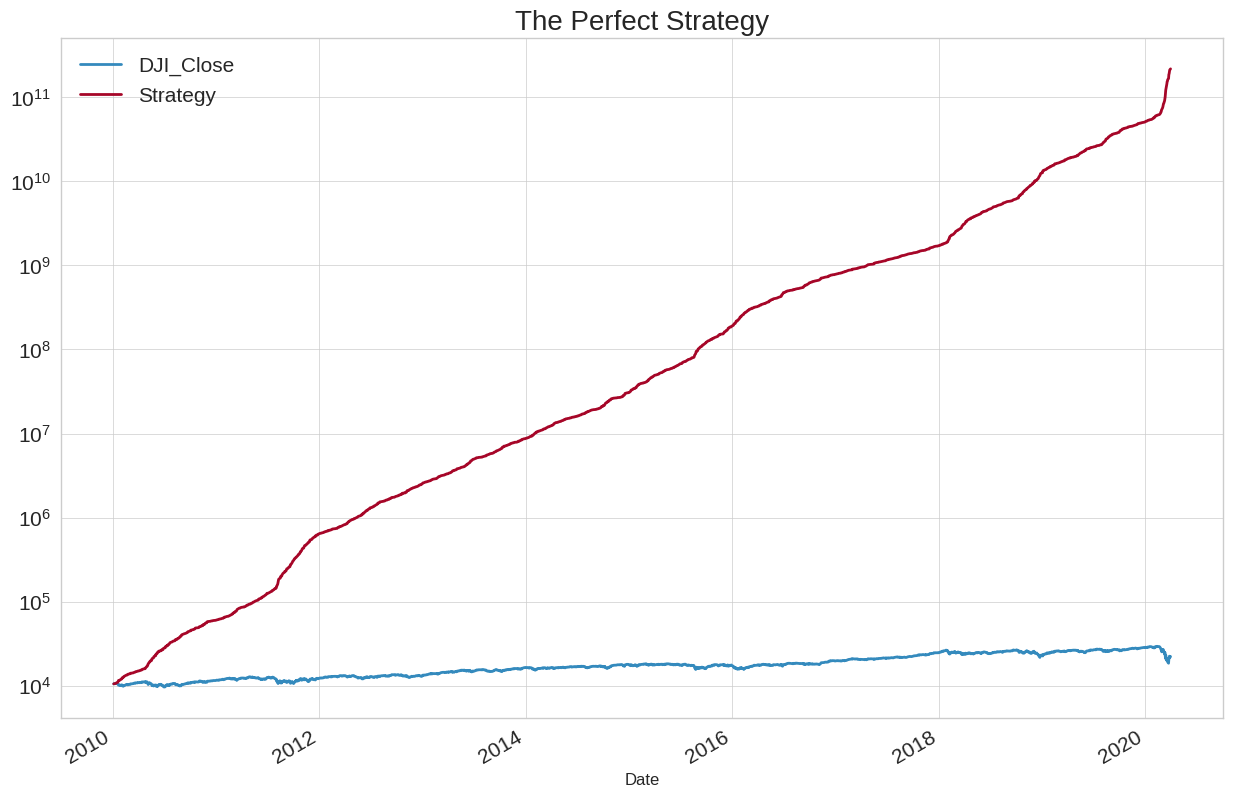

In [284]:
df[["DJI_Close", "Strategy"]].plot(figsize = (15, 10), fontsize = 15, logy = True)
plt.legend(fontsize = 15)
plt.title("The Perfect Strategy", fontsize = 20)
plt.show()

In [286]:
summary_ann(df[["DJI_Return", "Strategy_Ret"]])

,Return
DJI_Return,0.087212
Strategy_Ret,1.660910
